In [1]:
import glob
import numpy as np

In [2]:
file_sets = ['O', 'S'] # O-> Set B (Normal ), S-> Set E (Seizure)
label_sets = [0,1] # 0->Normal, 1-> Seizure

In [3]:
# data is in folders 'input/O, input/S' etc.
data=[]
labels = []
for file_set, label in zip(file_sets, label_sets):
    for file in glob.glob('input/'+ file_set +'/*.txt'):
        with open(file) as f:
            int_list = [int(x) for x in f]
            data.append(int_list)
            labels.append(label)

In [4]:
data = np.asarray(data)
data.shape

(200, 4097)

In [5]:
labels = np.asarray(labels)
print(labels.shape)

(200,)


In [6]:
# randomize the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [7]:
# split the data into training and validation set
training_samples = 160
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:]
y_val = labels[training_samples:]
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (160, 4097)
y_train shape: (160,)
x_val shape: (40, 4097)
y_val shape: (40,)


In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1000, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 1s - loss: 6.7878 - acc: 0.5062 - val_loss: 5.9390 - val_acc: 0.5500
Epoch 2/100
160/160 [==============================] - 0s - loss: 4.8736 - acc: 0.6375 - val_loss: 5.5856 - val_acc: 0.5500
Epoch 3/100
160/160 [==============================] - 0s - loss: 4.0891 - acc: 0.7125 - val_loss: 4.9859 - val_acc: 0.5750
Epoch 4/100
160/160 [==============================] - 0s - loss: 3.6493 - acc: 0.7625 - val_loss: 4.9152 - val_acc: 0.6000
Epoch 5/100
160/160 [==============================] - 0s - loss: 3.6154 - acc: 0.7625 - val_loss: 4.8549 - val_acc: 0.6000
Epoch 6/100
160/160 [==============================] - 0s - loss: 3.2732 - acc: 0.7875 - val_loss: 4.8516 - val_acc: 0.5750
Epoch 7/100
160/160 [==============================] - 0s - loss: 3.1946 - acc: 0.8000 - val_loss: 4.9074 - val_acc: 0.5750
Epoch 8/100
160/160 [==============================] - 0s - loss: 3.1036 - acc: 0.8000 

160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4746 - val_acc: 0.5250
Epoch 67/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4748 - val_acc: 0.5250
Epoch 68/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4739 - val_acc: 0.5250
Epoch 69/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4734 - val_acc: 0.5250
Epoch 70/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4723 - val_acc: 0.5250
Epoch 71/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4752 - val_acc: 0.5250
Epoch 72/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4738 - val_acc: 0.5250
Epoch 73/100
160/160 [==============================] - 0s - loss: 1.4990 - acc: 0.9062 - val_loss: 5.4738 - val_acc: 0.5250
Epoch 74/100


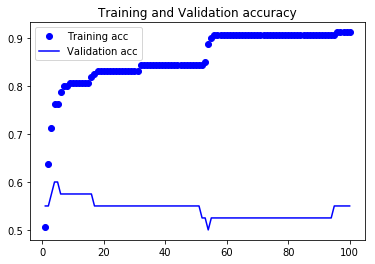

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()